## WhatsBusy Code Challenge

Yuan Feng



## Question 1 - Python

In [108]:
'''Implement class MoneyBox for working with a virtual money box. Each money box has a limited capacity (int): 
max number of coins in the money box. When you create a money box the number of coins = 0.'''

class MoneyBox:
    def __init__(self, capacity):
        self.capacity = capacity
        self.current = 0 
        self.choice = True

    def can_add(self, v):
        # True, if you can add v coins, False otherwise
        
        ttl = self.current + v
        if ttl <= self.capacity:
            return self.choice == True
        else:
            return self.choice == False
        

    def add(self, v):
        # put v coins to moneybox
        
        self.choice =  self.can_add(v)
     
        if self.choice is True:
            self.current =+ v
            return self.current
        else:
            self.current = self.capacity
            return print("Inputing %0.0f coin(s) will exceed maximum capacity" % (v))


## Question 2 - SQL

Implement SQL query to select employees first names and last names (employee and managers) who worked from 2020-01-01 to 2020-01-31. Note that dt_work_from and dt_work_to are date-time fields.


**Answer**

**SELECT** b.first_name, b.last_name

**FROM** table_1 as a

**LEFT JOIN** employee as b **ON** a.id_employee = b.id_employee

**WHERE** a.dt_work_from = '2020-01-01' **AND** a.dt_work_to = '2020-01-31'

**UNION**

**SELECT** c.first_name, c.last_name

**FROM** table_1 as a

**LEFT JOIN** manager as c **ON** a.id_manager = c.id_manager

**WHERE** a.dt_work_from = '2020-01-01' **AND** a.dt_work_to = '2020-01-31'

## Question 3 - Pandas


a.	
Input:

    df = pd.DataFrame({'days': [1, 1, 2, 2, 1, 3, 4],
                   'values': [10, 10, 5, 3, -2, 4, 20]})

Output:

    pd.DataFrame({'days': [1, 2, 3, 4],
              'mean_values': [6, 4, 4, 20],
              'median_values': [10, 4, 4, 20],
              'max_values': [10, 5, 4, 20],
              'min_values': [-2, 3, 4, 20]})


In [162]:
import pandas as pd
df = pd.DataFrame({'days': [1, 1, 2, 2, 1, 3, 4], 'values': [10, 10, 5, 3, -2, 4, 20]})

'''Aggregate by days and get mean, median, max, and min values for values'''

def algorithm_a(df):
    
    df_a = df.groupby(['days']).mean()
    df_a["median_values"] = df.groupby(['days']).median()["values"]
    df_a["max_values"] = df.groupby(['days']).max()["values"]
    df_a["min_values"] = df.groupby(['days']).min()["values"]
    df_a.rename(columns={"values": "mean_values"})
    
    return df_a

In [163]:
algorithm_a(df)

,values,median_values,max_values,min_values
days,,,,
1,6,10,10,-2
2,4,4,5,3
3,4,4,4,4
4,20,20,20,20


b.	
Input:

    df = pd.DataFrame({'employee': [1001, 1002, 1004, 1001, 1001, 1002, 1004, 1005, 1005],
                       'pos': [2, 2, 2, 2, 2, 2, 2, 2, 2],
                       'amount': [125, 542, 2345, 892, 100, 1234, 657, 34, 35]})

   
 Output:
 
    pd.DataFrame({'employee': [1004, 1001],
              'pos': [2, 2],
              'amount_diff': [1688, 792]})

In [207]:
df2 = pd.DataFrame({'employee': [1001, 1002, 1004, 1001, 1001, 1002, 1004, 1005, 1005],
                       'pos': [2, 2, 2, 2, 2, 2, 2, 2, 2],
                       'amount': [125, 542, 2345, 892, 100, 1234, 657, 34, 35]})

''' Select the top 2 employees with the max difference between the lowest amount and the highest amount for each employee.'''

def algorithm_b(df):

    df_b = df.groupby(['employee']).max()
    df_b["min"] = df2.groupby(['employee']).min()["amount"]
    df_b["amount_diff"] = df_b["amount"] - df_b["min"]
    df_b = df_b.drop(['min', 'amount'], axis=1)
    
    return df_b.nlargest(2, 'amount_diff')

In [208]:
algorithm_b(df2)

,pos,amount_diff
employee,,
1004,2,1688
1001,2,792


## Question 4 - ML


Suppose you have data about the daily number of visitors of some restaurant. See test_restaurant.csv. Research the provided dataset, and create a forecast model for 1 day forward.

a.	Expected output: Create a notebook with all stages of the analysis, key metrics, output and plots.

b.	If you applied a few methods, provide some details, and explain why you rejected them.

c.	Imagine like you have this task as a real one. Create a new project on github, and demonstrate the development process.

d.	Do not spend a lot of time on this task. Demonstrate one or few zero approaches. 

In [491]:
#import packages
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer
import pickle
from pmdarima.pipeline import Pipeline
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape
from fbprophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from sklearn.metrics import mean_squared_error, r2_score

In [494]:
#loading data
res = pd.read_csv("test_restaurant.csv")

In [495]:
#parsing date time
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
res = pd.read_csv('test_restaurant.csv', parse_dates=['date'], index_col='date', date_parser=dateparse)

## EDA & Missing Values


 - There are 3651 lines of records in the dataset with NO missing values. 
 - The 'num_visitors' variable overall displays a Normal Distribution. 
 - However, 2 customer records are negative, which is not realistic so I converted these two records to zero.

In [496]:
res.describe()

,num_visitors
count,3651.000000
mean,24.782759
std,11.188746
min,-7.867497
25%,17.042217
50%,22.950304
75%,29.260646
max,69.849130


In [497]:
res.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3651 entries, 2000-01-01 to 2009-12-29
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_visitors  3651 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


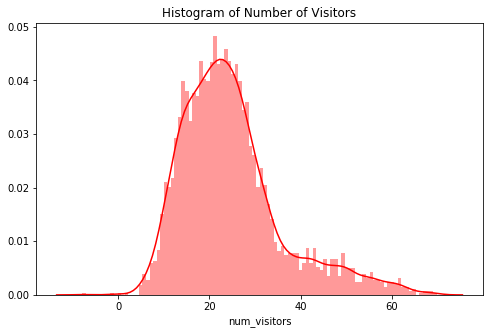

In [285]:
fig, (axis1) = plt.subplots(1,1,figsize=(8,5))
sns.distplot(res.num_visitors, bins=100,color='red' ).set_title("Histogram of Number of Visitors")
plt.show()

In [501]:
#deal with outliers - number of customers should always be 0 or positive
res[res < 0] = 0

## Trend & Seasonality


 -  Using Differencing, the seasonality could be seperated, indicating fluctions are according to date.

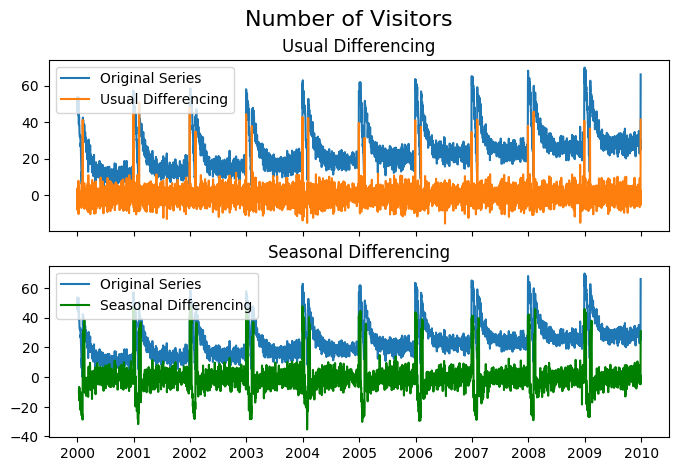

In [294]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(8,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(res[:], label='Original Series')
axes[0].plot(res[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Differencing
axes[1].plot(res[:], label='Original Series')
axes[1].plot(res[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Number of Visitors', fontsize=16)
plt.show()

## Model Fitting


 -  **Baseline Model ARIMA** 
 
 A classic model for conducting time series analyais and a common choice as baseline model in various papers.
 
 
 -  **Facebook Prophet Model** 
 
 A famous and widely-implemented forecasting model developed by Facebook. It works best with strong seasonal effects and various historical seasons of data, which applies to the current dataset.
 
 
 -  **XGBoost Model** 
 
 A combination of machine learning method and time series analysis. The trick is to transform unsupervised data into supervised data via feature engineering. Low error rate is its main benefit.
 
 
 - **Train & Test Split**
 
 All three models used first 80% of the data as training data and the rest 20% as test data. Models are fitted on the training data and performances are evaluated on the test data.
 
 
 - **Model Evaluation**
 
 Models are evaluated based on three criterias: MSE, RMSE, and SMAPE. The goal is to have the smallest of these error indicators.

**ARIMA Model**

I used auto_arima and step-wise approach, which are convenient as they avoid the trouble of finding Q,D,P values manually. 

In [516]:
#train test date split
#train, test = train_test_split(res, train_size=2920)
train = res[0:2920]
test = res[2920:]

In [262]:
#modeling building & fitting
stepwise_model = pm.auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=17510.262, BIC=17540.136, Time=19.558 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=20022.482, BIC=20034.432, Time=0.201 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 0, 12) (constant=True); AIC=18806.699, BIC=18830.598, Time=3.461 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=17508.747, BIC=17532.646, Time=16.712 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=False); AIC=20020.483, BIC=20026.458, Time=0.176 seconds
Fit ARIMA: (1, 1, 1)x(0, 1, 0, 12) (constant=True); AIC=19621.467, BIC=19645.367, Time=1.359 seconds
Fit ARIMA: (1, 1, 1)x(1, 1, 1, 12) (constant=True); AIC=17502.719, BIC=17538.568, Time=26.442 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 12); setting score to inf (at le

In [278]:
#prediction on test data
future_forecast = stepwise_model.predict(n_periods=732)

In [279]:
#transforming
future_forecast_plot = pd.DataFrame(future_forecast[0:731],index = test.index,columns=['Prediction'])

**ARIMA Interpretation**

The results are not quite satisfactory.
Below is a plot of prediction vs. test data. Quite obvious the prediction resulta re not accurate.

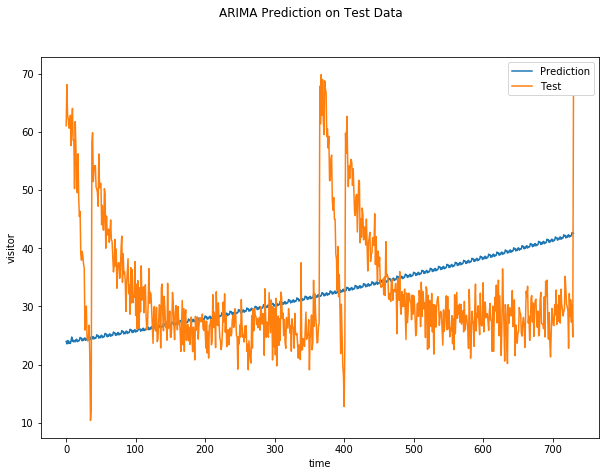

In [504]:
#prediction vs. test
fig = plt.figure(figsize=(10, 7))
plt.xlabel('time'); plt.ylabel('visitor')
plt.plot(np.arange(731), future_forecast_plot["Prediction"],label='Prediction')
plt.plot(np.arange(731), test["num_visitors"],label='Test')
plt.suptitle('ARIMA Prediction on Test Data')
plt.legend()
plt.show()

**Prophet**

Assuming the data came from a restaurant located in US and since the dataset exhibitted seasonlity,  US holidays are applied in the model as addition parameters.

In [308]:
#Prophet
from fbprophet import Prophet
data=pd.read_csv('test_restaurant.csv')
#data[data["num_visitors"] < 0] = 0
df = data.rename(columns={'date':'ds', 'num_visitors':'y'})

In [309]:
#train test split
p_train, p_test = train_test_split(df, train_size=2920)

In [346]:
#fitting model
l = Prophet(daily_seasonality=True)
l.add_country_holidays(country_name='US')
l.fit(p_train)
future_l = l.make_future_dataframe(periods=732, freq='D')
future_l.tail()
forecast_l = l.predict(future_l)

**Prophet Interpretation**

Overall Prophet results are quite accurate based on the below plot. We can compare with XGBoost using detailed statistics.

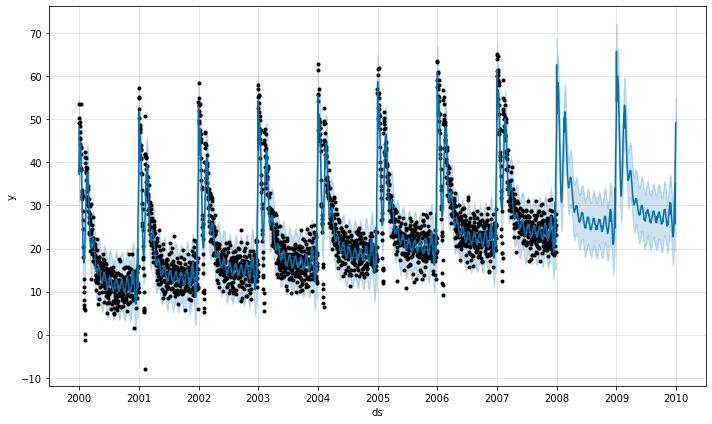

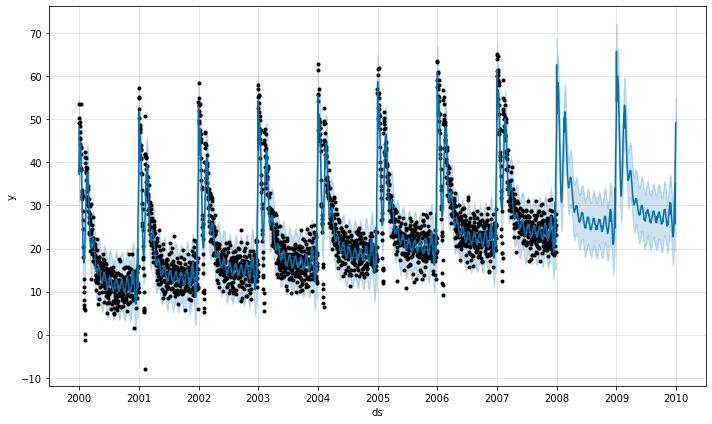

In [518]:
#The following plot shows prediction using training & test data and comparision
l.plot(forecast_l)

<function matplotlib.pyplot.show(*args, **kw)>

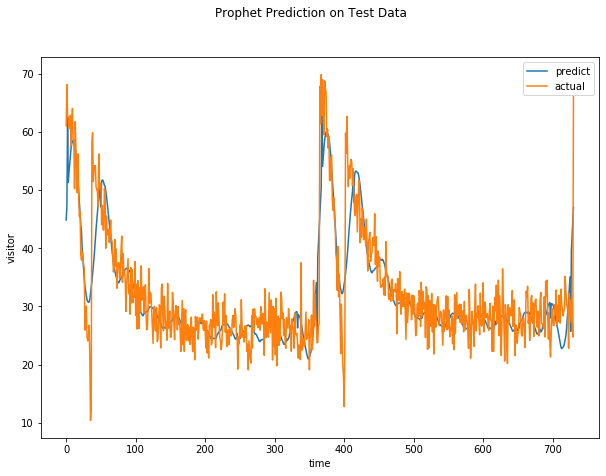

In [487]:
#prediction vs. test
fig = plt.figure(figsize=(10, 7))
plt.xlabel('time'); plt.ylabel('visitor')
plt.plot(np.arange(731), forecast_l["yhat"][2920:3651],label='predict')
plt.plot(np.arange(731), p_test["y"],label='actual')
plt.suptitle('Prophet Prediction on Test Data')
plt.legend()
plt.show

In [478]:
test_num  = p_test["y"]
pred = forecast_l["yhat"][2920:3651]

**Prophet further insights**

 - Overall, the restaurant is improving in terms of number of customers.
 - January and February are the busies months.
 - Sunday to Wednesday are the busies days.

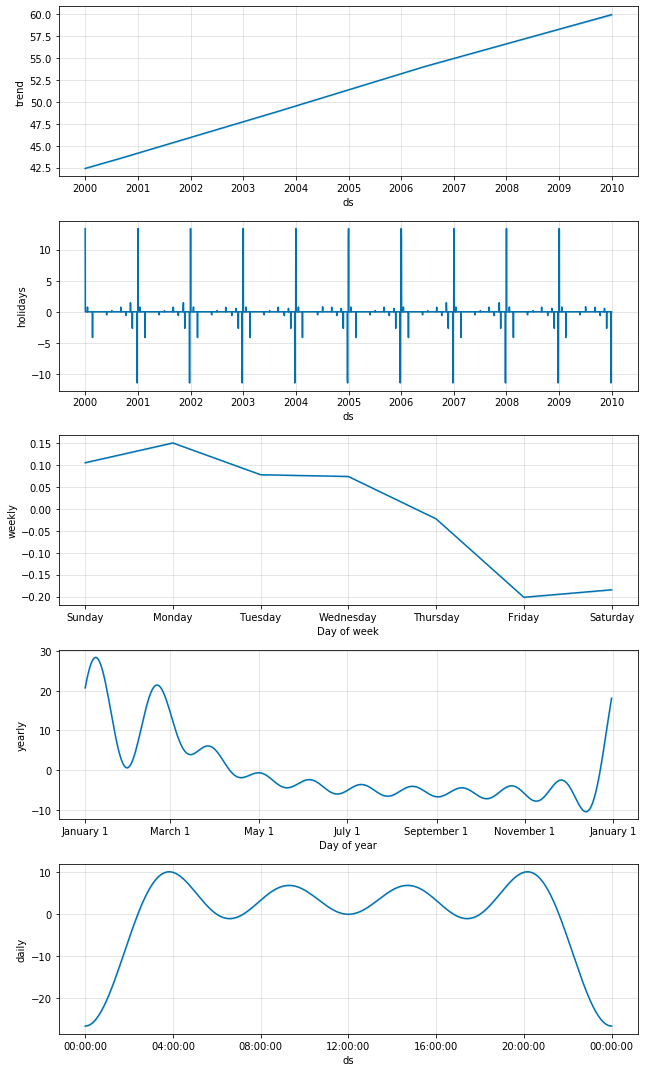

In [357]:
fig = l.plot_components(forecast_l)

**XGBoost**

For feature engineering, I selected previous 30 days as covariate and the following day as response variable, meaning we could predict the number of visitors of a given date using records of the previous month.

In [370]:
X = res["num_visitors"]

In [414]:
lag = 30
X_matrix = []
y = []
for i in range(len(X) - lag):
    sample =[]
    for n in range(lag):
        sample.append(X[i+n])
        
    X_matrix.append(sample)
    y.append(X[i+lag])

X_test_predict = []
for i in range(lag):
    X_test_predict.append(X[-(lag-i)])
    
X_matrix.append(X_test_predict)

XX = np.array(X_matrix)
y =  np.array(y)

In [425]:
x_train = XX[0:2920]
y_train = y[0:2920]
x_test = XX[2920:]
y_test = y[2920:]

In [423]:
# setup regressor
xgb_model = xgb.XGBRegressor() 
# performance a grid search
tweaked_model = GridSearchCV(
    xgb_model,   
    {
        'max_depth':[1,2,5,10,20],
        'n_estimators':[20,30,50,70,100],
        'learning_rate':[0.1,0.2,0.3,0.4,0.5]
    },   
    cv = 3,   
    verbose = 1,
    n_jobs = -1,  
    scoring = 'neg_median_absolute_error')
tweaked_model.fit(x_train,y_train)
    

print('Best: %f using %s'%(tweaked_model.best_score_, tweaked_model.best_params_))

Fitting 3 folds for each of 125 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:  1.8min finished


[20:31:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best: -2.424820 using {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50}


In [431]:
y_predict = tweaked_model.predict(x_test)

**XGBoost Interpretation**

The XGBoost model performs quite well judging from the below plot.

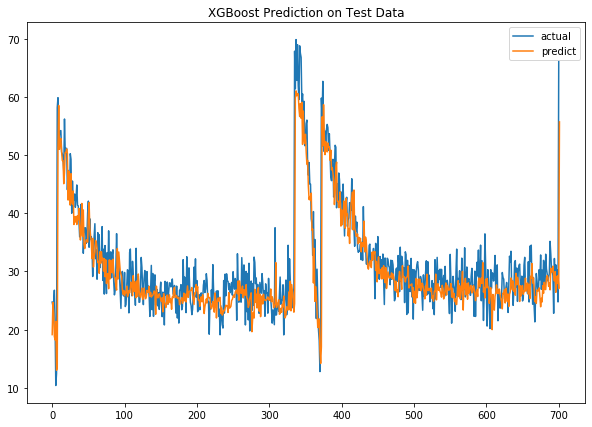

In [488]:
plt.plot(y_test,label='actual')
plt.plot(y_predict,label='predict')
plt.legend(loc='best')
plt.title("XGBoost Prediction on Test Data")
plt.show()

## Results and Comparision

**Optimal Model - XGBoost**

XGBoost model has the smallest error rates in all MSE, RMSE and SMAPE, so it was chosen as best model.

The result for predicting one day forward is **56** customers.

In [528]:
print(" ====== ARIMA ====== ")
print("Mean squared error: %.4f" % mean_squared_error(test, future_forecast_plot))
print("RMSE: %.4f"% np.sqrt(((sum((test["num_visitors"] - future_forecast_plot["Prediction"])**2))/731)))
print("SMAPE:  %.4f" % smape(test, future_forecast_plot))
print("Preditcted number of customers of one day forward: %.f" % future_forecast[-1:])

print(" ====== Prophet ====== ")

print("Mean squared error: %.4f"%mean_squared_error(test_num, pred))
print("RMSE: %.4f"% np.sqrt(((sum((test_num-pred)**2))/len(pred))))
print("SMAPE: %.4f"%smape(test_num, pred))
print("Preditcted number of customers of one day forward: %.f" % forecast_l["yhat"][3651:])


print(" ====== XGBoost ====== ")
print("Mean squared error:  %.4f" % mean_squared_error(y_test, y_predict[:-1]))
print('RMSE: %.4f'%np.sqrt((sum((y_predict[:-1]-y_test)**2))/len(y_predict[:-1])) )
print("SMAPE:  %.4f" % smape(y_test, y_predict[:-1]))
print("Preditcted number of customers of one day forward: %.f"% y_predict[-1])

 ====== ARIMA ====== 
Mean squared error: 150.2937
RMSE: 12.2594
SMAPE:  26.8847
Preditcted number of customers of one day forward: 42
 ====== Prophet ====== 
Mean squared error: 26.8444
RMSE: 5.1812
SMAPE: 11.2926
Preditcted number of customers of one day forward: 49
 ====== XGBoost ====== 
Mean squared error:  24.8745
RMSE: 4.9874
SMAPE:  10.6847
Preditcted number of customers of one day forward: 56
